<a href="https://colab.research.google.com/github/RiH-137/CNN_imgClassification/blob/main/CNN_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOGS-vs-CATS datasets

2 classes--> dogs and cats

### Downloading dataset from kaggle

In [1]:
!pip install -q kaggle

In [2]:
#connecting to kaggle server

!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/kaggle.json', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
!pip list

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense,MaxPooling2D,Flatten

In [ ]:
#internally it is using generator concept which is there in python---> to use memory in efficient manner

train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    batch_size=32,
    image_size=(256,256),         #since we have different image of different sizes so we need to fix the size so we generalize it.
    labels="inferred",
    label_mode="int"              #assisgning cat==0 and dog==1

)


#test_db
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

In [ ]:
train_ds

In [ ]:
for i in train_ds:
  print (i)

In [ ]:
#if we want fast process-->unit scalling
#normalization

def process(image,label):
  tf.cast(image/255, tf.float32)
  return image, label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
model=Sequential()

In [ ]:
#input layer

#first convolution layer
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')))

#second convolution network
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))      #since 32 input therefore there must be 32 feature map
model.add((MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')))

#third convolution layer
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add((MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')))

#model flattening
model.add(Flatten())

#creating NN
#adding first hidden layer with 128 neurons and relu activation
model.add(Dense(128, activation='relu'))
#adding first hidden layer with 64 neurons and relu activation
model.add(Dense(64, activation='relu'))

#output layer
#here we have 1 output layer since it is binary classification
model.add(Dense(1, activation='sigmoid'))

#### In order to increase accuracy we can perform batch normalization and dropout

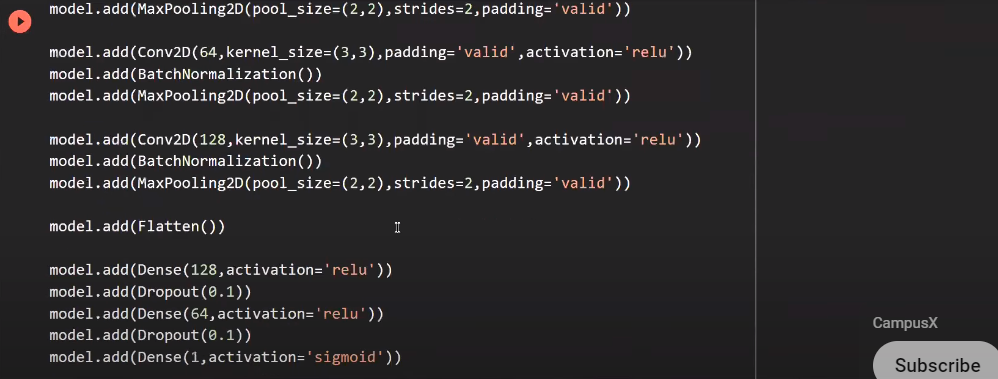

In [ ]:
model

In [ ]:
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history=model.fit(train_ds, epochs=2, validation_data=validation_ds)
history

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
#to save the model
model.save("/content/dog_cat.h5")

In [ ]:
#in order to test our model we need to download some image from the google and stored in testing_img

In [ ]:
#with MATPLOTLIB
import matplotlib.pyplot as plt


In [ ]:
test_img=plt.imread(r'/content/testing_img/dog-skateboarding.webp')

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

we need to resize the image...

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread(r'/content/testing_img/cat_img.jpg')
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
pred=model.predict(test_input)
pred

model retur==> 0 means its a cat.

In [ ]:
if pred==0:
  print("cat")
else:
  print("dog")

#here are some error and hence we need to use
1. drop out
2. normalizarions
3. batch normalization etc. to make our model good.